In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

## データの読み込み

In [3]:
# データの読み込み
# df_org = pd.read_csv('./data/input_01.csv')
# df_org = pd.read_csv('./data/input_02.csv')
# df_org = pd.read_csv('./data/input_03.csv')
# df_org = pd.read_csv('./data/input_04.csv')
# df_org = pd.read_csv('./data/input_05.csv')
df_org = pd.read_csv('./data/input_06.csv')

In [4]:
# データ量が多いのでコーディング中はサンプリング
df = df_org.sample(10000, replace=True)
# df = df_org

In [5]:
df.head(1)

,Unnamed: 0,ID,name,category,main_category,currency,goal,pledged,state,backers,...,y_deadline,project_time,goal_per_day,main_category_score,category_score,class,n_words,word_count,name_len,log_goal
111399,127109,1645234063,"""Jay's World"" reality television show concept ...",Documentary,Film & Video,USD,24410.0,0.0,0,0,...,-0.222521,2,12204.389781,high,mid_high,Film & Video**Documentary,7,7,53.0,10.102748


In [6]:
df.columns

Index(['Unnamed: 0', 'ID', 'name', 'category', 'main_category', 'currency',
       'goal', 'pledged', 'state', 'backers', 'country', 'usd pledged',
       'usd_pledged_real', 'period', 'launched_year', 'launched_month',
       'launched_day', 'launched_hour', 'is_launched_weak_year', 'dayfloat',
       'monthfloat', 'x_launched', 'y_launched', 'deadline_hour',
       'deadline_year', 'deadline_month', 'x_deadline', 'y_deadline',
       'project_time', 'goal_per_day', 'main_category_score', 'category_score',
       'class', 'n_words', 'word_count', 'name_len', 'log_goal'],
      dtype='object')

In [7]:
# df[['usd_goal_real', 'log_goal']].head()
# # 対数変換してるのに40000はさすがにおかしい
# df['log_goal'].hist()

# # この外れ値除去を行うと、最終的な精度が悪化した
# med = df['usd_goal_real'].median()
# MAD = 1.4826 * np.median(abs(df['usd_goal_real']-med))
# df = df[(med - 3 * MAD < df['usd_goal_real']) & (df['usd_goal_real'] < med + 3 * MAD)]

# df['log_goal'] = np.log(df['usd_goal_real'])

# df['usd_goal_real'].hist()

# df['log_goal'].hist()

# df['period'].hist()

In [8]:
# # ここでNaNが多いものはできれば除きたい
# df.isnull().sum()

## データの準備

In [9]:
# # 数値エンコーディング（GBDT以外の場合は必須）
# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
# df = df.apply(encoder.fit_transform)

In [10]:
df.head()

,Unnamed: 0,ID,name,category,main_category,currency,goal,pledged,state,backers,...,y_deadline,project_time,goal_per_day,main_category_score,category_score,class,n_words,word_count,name_len,log_goal
111399,127109,1645234063,"""Jay's World"" reality television show concept ...",Documentary,Film & Video,USD,24410.0,0.0,0,0,...,-0.222521,2,12204.389781,high,mid_high,Film & Video**Documentary,7,7,53.0,10.102748
53336,60737,1308767173,Bull Warriors - Chaos Dwarfs for Fantasy Football,Tabletop Games,Games,EUR,2500.0,25517.0,1,276,...,0.093364,32,78.124756,high,high,Games**Tabletop Games,8,8,49.0,7.990408
302660,345510,830022904,Almost True,Photobooks,Photography,USD,15000.0,24212.0,1,293,...,0.111964,32,468.748535,mid,mid_high,Photography**Photobooks,2,2,11.0,9.615805
51229,58364,1296829056,Fitten Mitten,Childrenswear,Fashion,USD,10000.0,204.0,0,10,...,-0.416961,44,227.272211,low,mid_high,Fashion**Childrenswear,2,2,13.0,9.210340
285659,326120,731015981,ARTificial Coral Reef SKULLpture,Conceptual Art,Art,GBP,1000.0,1010.0,1,30,...,0.532032,29,34.482640,high,mid_high,Art**Conceptual Art,4,4,32.0,7.375062


In [11]:
# y = df[['state']]
# # x_cols = ['class', 'country', 'period', 'log_goal', 'launched_year', 'launched_month', 'launched_day', 
# #          'name_vowel_ratio', 'Goal_1000', 'Goal_10', 'Last_Year', 'name_len', 'name_number_of_word', 
# #           'mean_goal_in_category_last_month', 'mean_goal_in_category_last_year','mean_goal_Last_6_Month']
# # x_cols = ['class', 'country', 'period', 'n_words', 'log_goal', 'launched_year', 'launched_month', 'launched_day', 
# #          'name_vowel_ratio', 'Goal_1000', 'Goal_500', 'Goal_10', 'median_goal_Last_Week']
# x_cols = ['class', 'period', 'log_goal', 'name_vowel_ratio', 'name_len', 'country', 
#          'launched_day', 'launched_month', 'launched_year', 'Last_Year', 'Last_Month', 'Last_Week', 
#          'mean_goal_in_category_last_year']
# x = df[x_cols]

## モデル学習（単体）

In [12]:
df.columns

Index(['Unnamed: 0', 'ID', 'name', 'category', 'main_category', 'currency',
       'goal', 'pledged', 'state', 'backers', 'country', 'usd pledged',
       'usd_pledged_real', 'period', 'launched_year', 'launched_month',
       'launched_day', 'launched_hour', 'is_launched_weak_year', 'dayfloat',
       'monthfloat', 'x_launched', 'y_launched', 'deadline_hour',
       'deadline_year', 'deadline_month', 'x_deadline', 'y_deadline',
       'project_time', 'goal_per_day', 'main_category_score', 'category_score',
       'class', 'n_words', 'word_count', 'name_len', 'log_goal'],
      dtype='object')

In [31]:
y = df[['state']]
x = df.drop('state', axis=1)

# select features
# prdict_feature = ['goal','name','main_category_score','category_score','project_time','goal_per_day','word_count']
prdict_feature = ['class', 'name', 'log_goal', 'n_words', 'name_len', 'country', 
         'launched_day', 'launched_month', 'launched_year', 'goal_per_day', 'word_count',
         'is_launched_weak_year', 'main_category_score','category_score', 'project_time']

x = x[prdict_feature]



In [32]:
x.head(2)

,class,name,log_goal,n_words,name_len,country,launched_day,launched_month,launched_year,goal_per_day,word_count,is_launched_weak_year,main_category_score,category_score,project_time
125679,Film & Video**Drama,Limbo Film Project - 213 lives of Julia,6.988044,8,39.0,IT,14,11,2015,34.482640,8,True,high,mid_high,29
207560,Fashion**Accessories,ABOLI Eco Friendly BlockPrinted Table Linen -U...,6.602995,8,60.0,SG,29,10,2017,62.499609,8,False,low,mid_high,16


In [33]:
from sklearn.model_selection import train_test_split

# 訓練データとテストデータを8:2に分割
# ※評価を揃えるため df 以外の引数は変更しないこと
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1234)

In [34]:
# https://www.kaggle.com/code/yairhadad1/kickstarter-predict-project-success-roc-0-78/notebook
# 上記のノートブックを参考にしてる解法
from sklearn.base import BaseEstimator, TransformerMixin
class ItemSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]

In [35]:
# https://kakakakakku.hatenablog.com/entry/2021/11/29/084330
# Pipelineを使うことで、前処理やML学習などを１つのオブジェクトとして扱え、可読性高く実装できる。
from sklearn.pipeline import Pipeline

# split
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train)

# name
from sklearn.feature_extraction.text import CountVectorizer  
name_pipeline = Pipeline([('name_column', ItemSelector(key = 'name')),
                          ('vectorizer', CountVectorizer(max_features=100))])

# dummeys
from sklearn.preprocessing import OneHotEncoder
one_hot_pipeline = Pipeline([('hot_columns', ItemSelector(key = ['main_category_score','category_score',
                                                                 'country', 'is_launched_weak_year'])),
                             ('oneHowEncoder', OneHotEncoder(handle_unknown='ignore',sparse=True))])

# min max scaler
from sklearn.preprocessing import MinMaxScaler
min_max_pipeline = Pipeline([('min_max_columns', ItemSelector(key = ['project_time','word_count',
                                                                     'goal_per_day', 'n_words', 'name_len'])),
                             ('minMaxScaler', MinMaxScaler())])

# Binning（連続的な特徴量を離散化する）
from sklearn.preprocessing import KBinsDiscretizer
k_bins_pipeline = Pipeline([('goal', ItemSelector(key = ['log_goal', 'launched_day', 'launched_month', 
                                                         'launched_year'])),
                             ('k_bins', KBinsDiscretizer(n_bins = 4,encode = 'onehot',strategy = 'quantile'))])

# FeatureUnion
from sklearn.pipeline import FeatureUnion
feature_pipeline = FeatureUnion([('one_hot',one_hot_pipeline),
                                 ('name',name_pipeline),
                                 ('min_max',min_max_pipeline),
                                 ('k_bins',k_bins_pipeline)])

# n_words/name_len/
# launched_day/
# prdict_feature = ['class', 'name', 'log_goal', 'n_words', 'name_len', 'country', 
#          'launched_day', 'launched_month', 'launched_year', 'goal_per_day', 'word_count',
#          'is_launched_weak_year', 'main_category_score','category_score', 'project_time']

feature_pipeline.fit(x_train)

x_train = feature_pipeline.transform(x_train)
x_valid = feature_pipeline.transform(x_valid)


In [36]:
# https://note.nkmk.me/python-scipy-sparse-matrix-csr-csc-coo-lil/
print(type(x_train))
print(x_train.data)

<class 'scipy.sparse._csr.csr_matrix'>
[1. 1. 1. ... 1. 1. 1.]


In [44]:
from sklearn.metrics import log_loss, roc_auc_score, accuracy_score


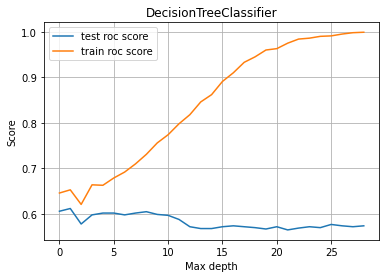

CPU times: user 10.2 s, sys: 327 ms, total: 10.6 s
Wall time: 10.1 s


In [45]:
%%time
scoreTest_DT = []
scoreTrain_DT = []
from sklearn.tree import DecisionTreeClassifier
for number in range(1,30):
    # print(number)
    clf = DecisionTreeClassifier(max_depth = number, class_weight = "balanced")
    clf.fit(x_train,y_train)
    y_score_train = clf.predict_proba(x_train)[:,1].round(0)
    y_score_valid = clf.predict_proba(x_valid)[:,1].round(0)

    # scoreTrain_DT.append(round(roc_auc_score(y_train, y_score_train) , 3))
    # scoreTest_DT.append(round(roc_auc_score(y_valid, y_score_valid) , 3))
    scoreTrain_DT.append(round(accuracy_score(y_train, y_score_train) , 3))
    scoreTest_DT.append(round(accuracy_score(y_valid, y_score_valid) , 3))
    
pd.DataFrame({'test roc score':scoreTest_DT,'train roc score':scoreTrain_DT}).plot(grid = True)
plt.xlabel('Max depth')
plt.ylabel('Score')
plt.title("DecisionTreeClassifier")
plt.show()

In [46]:
np.array(scoreTest_DT).argmax()

1

In [47]:
# number=1のときmax_depth=1のはずなので、+1しておく
clf_DT = DecisionTreeClassifier(max_depth = np.array(scoreTest_DT).argmax()+1, class_weight = "balanced")
clf_DT.fit(x_train,y_train)

print("DT roc_train:",round(accuracy_score(y_train, clf_DT.predict_proba(x_train)[:,1].round(0)) , 3))
print("DT roc_test:",round(accuracy_score(y_valid, clf_DT.predict_proba(x_valid)[:,1].round(0)) , 3))

# DT_cross_score = cross_val_score(clf_DT, X_train, y_train, cv=5, scoring='roc_auc').mean()
# DT_roc = round(roc_auc_score(y_valid, clf_DT.predict_proba(x_valid)[:,1]) , 3)
DT_roc = round(accuracy_score(y_valid, clf_DT.predict_proba(x_valid)[:,1].round(0)) , 3)
# acc_train = accuracy_score(y_true=y_test, y_pred=y_pred)

DT roc_train: 0.653
DT roc_test: 0.612


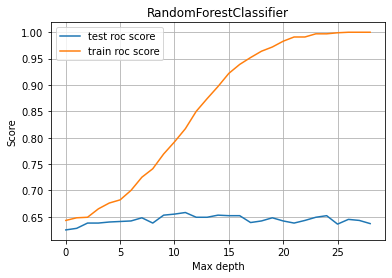

CPU times: user 4min 12s, sys: 1.29 s, total: 4min 14s
Wall time: 4min 26s


In [48]:
%%time
scoreTest_RF = []
scoreTrain_RF = []
from sklearn.ensemble import RandomForestClassifier
for number in range(1,30):
    clf = RandomForestClassifier(max_depth = number,n_estimators = 100, class_weight = "balanced")
    clf.fit(x_train,y_train)
    y_score_train = clf.predict_proba(x_train)[:,1]
    y_score_valid = clf.predict_proba(x_valid)[:,1]

    scoreTrain_RF.append(round(accuracy_score(y_train, y_score_train.round(0)) , 3))
    scoreTest_RF.append(round(accuracy_score(y_valid, y_score_valid.round(0)) , 3))
    
pd.DataFrame({'test roc score':scoreTest_RF,'train roc score':scoreTrain_RF}).plot(grid = True)
plt.xlabel('Max depth')
plt.ylabel('Score')
plt.title("RandomForestClassifier")
plt.show()
# acc_train = accuracy_score(y_true=y_test, y_pred=y_pred)

In [49]:
cls_RF = RandomForestClassifier(max_depth = np.array(scoreTest_RF).argmax(),n_estimators = 100, class_weight = "balanced")
cls_RF.fit(x_train,y_train)

print("RF roc_train:",round(accuracy_score(y_train, cls_RF.predict_proba(x_train)[:,1].round(0)) , 3))
print("RF roc_test:",round(accuracy_score(y_valid, cls_RF.predict_proba(x_valid)[:,1].round(0)) , 3))

# RF_cross_score = cross_val_score(cls_RF, X_train, y_train, cv=5, scoring='roc_auc').mean()
RF_roc = round(accuracy_score(y_valid, cls_RF.predict_proba(x_valid)[:,1].round(0)) , 3)


RF roc_train: 0.787
RF roc_test: 0.654


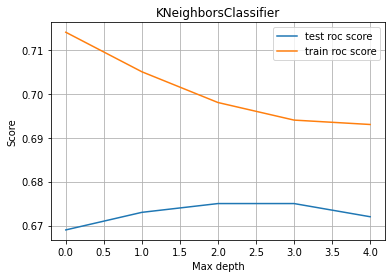

CPU times: user 39.6 s, sys: 3.88 s, total: 43.4 s
Wall time: 45.2 s


In [50]:
%%time
scoreTest = []
scoreTrain = []
from sklearn.neighbors import KNeighborsClassifier
knnRange = [50,100,200,300,350]
for number in knnRange:
    clf = KNeighborsClassifier(n_neighbors = number)
    clf.fit(x_train,y_train)
    y_score_train = clf.predict_proba(x_train)[:,1]
    y_score_valid = clf.predict_proba(x_valid)[:,1]

    scoreTrain.append(round(roc_auc_score(y_train, y_score_train) , 3))
    scoreTest.append(round(roc_auc_score(y_valid, y_score_valid) , 3))
    
pd.DataFrame({'test roc score':scoreTest,'train roc score':scoreTrain}).plot(grid = True)
plt.xlabel('Max depth')
plt.ylabel('Score')
plt.title("KNeighborsClassifier")
plt.show()


In [51]:
# f1=0.4
# f2=0.8

# print(round(f1,0))
# print(round(f2,0))


In [52]:
clf_KNN = KNeighborsClassifier(n_neighbors = knnRange[np.array(scoreTest).argmax()])
# clf_KNN = KNeighborsClassifier(n_neighbors = 50)
clf_KNN.fit(x_train,y_train)

print("KNN roc_train:",round(accuracy_score(y_train, clf_KNN.predict_proba(x_train)[:,1].round(0)) , 3))
print("KNN roc_test:",round(accuracy_score(y_valid, clf_KNN.predict_proba(x_valid)[:,1].round(0)) , 3))

# KNN_cross_score = cross_val_score(clf_KNN, X_train, y_train, cv=5, scoring='roc_auc').mean()
KNN_roc = round(accuracy_score(y_valid, clf_KNN.predict_proba(x_valid)[:,1].round(0)) , 3)


KNN roc_train: 0.664
KNN roc_test: 0.609


In [53]:
%%time
from sklearn.naive_bayes import GaussianNB
clf_NB = GaussianNB()
clf_NB.fit(x_train.todense(),y_train)
y_score_train = clf_NB.predict_proba(x_train.todense())[:,1]
y_score_valid = clf_NB.predict_proba(x_valid.todense())[:,1]

print("NB roc_train:",round(accuracy_score(y_train, y_score_train.round(0)) , 3))
print("NB roc_test:",round(accuracy_score(y_valid, y_score_valid.round(0)) , 3))

# NB_cross_score = cross_val_score(clf_NB, X_train.todense(), y_train, cv=5, scoring='roc_auc').mean()
NB_roc = round(accuracy_score(y_valid, y_score_valid.round(0)) , 3)

NB roc_train: 0.5
NB roc_test: 0.511
CPU times: user 301 ms, sys: 6.58 ms, total: 308 ms
Wall time: 310 ms


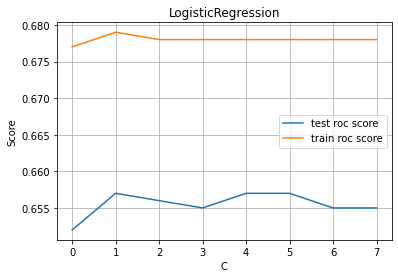

CPU times: user 8.51 s, sys: 373 ms, total: 8.88 s
Wall time: 8.38 s


In [54]:
%%time
from sklearn.linear_model import LogisticRegression
scoreTest_LR = []
scoreTrain_LR = []
C_range = [1,2,3,4,5,6,7,8]
for number in C_range:
    clf = LogisticRegression(C = number, class_weight = "balanced", penalty = 'l2')
    clf.fit(x_train,y_train)
    y_score_train = clf.predict(x_train)
    y_score_valid = clf.predict(x_valid)
    scoreTrain_LR.append(round(roc_auc_score(y_train, y_score_train) , 3))
    scoreTest_LR.append(round(roc_auc_score(y_valid, y_score_valid) , 3))
     
pd.DataFrame({'test roc score':scoreTest_LR,'train roc score':scoreTrain_LR}).plot(grid = True)
plt.xlabel('C')
plt.ylabel('Score')
plt.title("LogisticRegression")
plt.show()

In [55]:
print("LR roc_train:",round(accuracy_score(y_train, clf.predict(x_train).round(0)) , 3))
print("LR roc_test:",round(accuracy_score(y_valid, clf.predict(x_valid).round(0)) , 3))

clf_LR = LogisticRegression(C = C_range[np.array(scoreTest_LR).argmax()], class_weight = "balanced")
clf_LR.fit(x_train,y_train)

# LR_cross_score = cross_val_score(clf_LR, X_train, y_train, cv=5, scoring='roc_auc').mean()
LR_roc = round(accuracy_score(y_valid, clf_LR.predict(x_valid).round(0)) , 3)


LR roc_train: 0.677
LR roc_test: 0.652


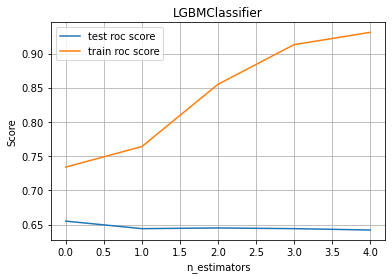

CPU times: user 59.5 s, sys: 440 ms, total: 59.9 s
Wall time: 15.7 s


In [56]:
%%time
from lightgbm import LGBMClassifier
scoreTrain_LGBMC = []
scoreTest_LGBMC = []
n_estimators = [50, 100,400,800,1000]
for number in n_estimators:
    clf = LGBMClassifier(
        n_estimators= number,
        num_leaves=15,
        colsample_bytree=.8,
        subsample=.8,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01
    )
    clf.fit(x_train,y_train)
    # y_score_train = clf.predict_proba(x_train)[:,1]
    # y_score_valid = clf.predict_proba(x_valid)[:,1]
    y_score_train = clf.predict(x_train)
    y_score_valid = clf.predict(x_valid)
    scoreTrain_LGBMC.append(round(accuracy_score(y_train, y_score_train) , 3))
    scoreTest_LGBMC.append(round(accuracy_score(y_valid, y_score_valid) , 3))
     
pd.DataFrame({'test roc score':scoreTest_LGBMC,'train roc score':scoreTrain_LGBMC}).plot(grid = True)
plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.title("LGBMClassifier")
plt.show()

In [57]:
clf_lgbm = LGBMClassifier(
        n_estimators= n_estimators[np.array(scoreTest_LGBMC).argmax()],
        num_leaves=15,
        colsample_bytree=.8,
        subsample=.8,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01
    )
clf_lgbm.fit(x_train, y_train)

# print("LGBM roc_train:",round(roc_auc_score(y_train, clf_lgbm.predict_proba(X_train)[:,1]) , 3))
# print("LGBM roc_test:",round(roc_auc_score(y_test, clf_lgbm.predict_proba(X_test)[:,1]) , 3))
print("LGBM roc_train:",round(accuracy_score(y_train, clf_lgbm.predict(x_train).round(0)) , 3))
print("LGBM roc_test:",round(accuracy_score(y_valid, clf_lgbm.predict(x_valid).round(0)) , 3))

LGBM_roc = round(roc_auc_score(y_valid, clf_lgbm.predict(x_valid).round(0)) , 3)

LGBM roc_train: 0.734
LGBM roc_test: 0.655


In [58]:
%%time
from sklearn.neural_network import MLPClassifier

clf_MLP = MLPClassifier(hidden_layer_sizes=(50,50), max_iter=100,tol=0.0001, alpha=0.0001,
                     solver='sgd', verbose= False)
clf_MLP.fit(x_train, y_train)

print("MLP roc_train:",round(roc_auc_score(y_train, clf_MLP.predict_proba(x_train)[:,1]) , 3))
print("MLP roc_test:",round(roc_auc_score(y_valid, clf_MLP.predict_proba(x_valid)[:,1]) , 3))

# MLP_cross_score = cross_val_score(clf_MLP, X_train, y_train, cv=5, scoring='roc_auc').mean()
MLP_roc = round(roc_auc_score(y_valid, clf_MLP.predict_proba(x_valid)[:,1]) , 3)


MLP roc_train: 0.708
MLP roc_test: 0.675
CPU times: user 2min 17s, sys: 56.6 s, total: 3min 14s
Wall time: 49.6 s


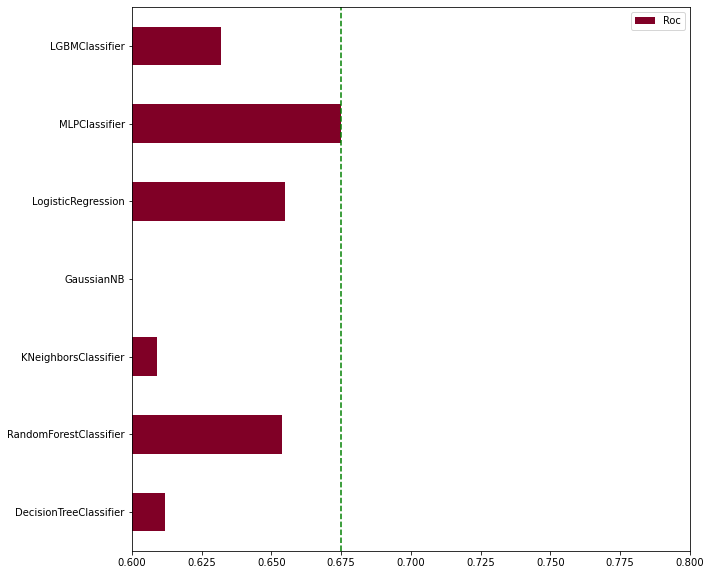

,Roc
DecisionTreeClassifier,0.612
RandomForestClassifier,0.654
KNeighborsClassifier,0.609
GaussianNB,0.511
LogisticRegression,0.655
MLPClassifier,0.675
LGBMClassifier,0.632


In [59]:
indexs = ["DecisionTreeClassifier","RandomForestClassifier",
          "KNeighborsClassifier","GaussianNB","LogisticRegression",
          # "VotingClassifier","BaggingClassifierLR",
          "MLPClassifier","LGBMClassifier"]
models = pd.DataFrame([], index = indexs)
models["Roc"] = [DT_roc,RF_roc, KNN_roc,NB_roc,LR_roc,MLP_roc,LGBM_roc]#,VOT_roc,LR_BAG_roc
models.plot.barh(figsize=(10,10 ), xlim = (0.6,0.8),colormap='YlOrRd_r')
plt.axvline(models["Roc"].max(),color = 'g',linestyle='--')
plt.show()

models

In [40]:
import lightgbm as lgb
from sklearn.metrics import log_loss, roc_auc_score, accuracy_score

# パラメータ
RANDOM_STATE = 10
num_round = 1000
TEST_SIZE = 0.2

# 学習データと評価データを作成
x_train, x_valid, y_train, y_valid = train_test_split(x_train,y_train,test_size=TEST_SIZE,random_state=RANDOM_STATE)

lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_valid, y_valid, reference=lgb_train)

In [41]:
# LightGBMのパラメータ設定
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 50,
    'verbose': 0
}

In [42]:
# 訓練データに対する予測
# LightGBM学習
model = lgb.train(params, lgb_train, num_round, 
                  valid_names=['train', 'valid'], valid_sets=lgb_eval,
                  early_stopping_rounds=20, verbose_eval=False)

# LightGBM推論
y_pred = model.predict(x_valid, num_iteration=model.best_iteration)

# 評価
y_pred = y_pred.round(0)
# acc_train = accuracy_score(y_test, y_pred)
acc_train = accuracy_score(y_true=y_valid, y_pred=y_pred)

print(f"訓練データの正答率: {100 * acc_train:.3f} %")    

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
訓練データの正答率: 65.167 %


In [43]:
# テストデータに対する予測
# LightGBM推論
y_pred = model.predict(x_test, num_iteration=model.best_iteration)
y_pred = y_pred.round(0)

# 評価
acc_train = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f"テストデータの正答率: {100 * acc_train:.3f} %")  

# print(y_test)
# print(y_pred)

ValueError: DataFrame.dtypes for data must be int, float or bool.
Did not expect the data types in the following fields: class, name, country, main_category_score, category_score

In [ ]:
# feature importance for Light GBM
predictor_columns = x_train.columns
importance = pd.DataFrame(model.feature_importance(), index=predictor_columns, columns=['importance'])
# display(importance)
display(importance.sort_values('importance', ascending = False))

# predictor_columns = x_train.columns
# feat_import = list(zip(predictor_columns, list(model.feature_importances())))
# ns_df = pd.DataFrame(data = feat_import, columns=['Feat_names', 'Importance'])
# ns_df_sorted = ns_df.sort_values(['Importance', 'Feat_names'], ascending = [False, True])

# ns_df_sorted

## 交差検証

In [ ]:
# !pip install lightgbm

In [ ]:
from sklearn.model_selection import StratifiedKFold
# from sklearn.model_selection import KFold
n_split = 5 # グループ数を設定（今回は5分割）
seed = 1234
# cross_valid_mae = 0
# split_num = 1
kf = StratifiedKFold(n_splits=n_split, shuffle=True, random_state=seed)
# kf = KFold(n_splits=n_split, shuffle=True, random_state=seed)

In [ ]:
from sklearn.metrics import log_loss, roc_auc_score, accuracy_score
import lightgbm as lgb

# scores_train = []
scores_valid = []
models = []
itr = 1

for train_idx, valid_idx in kf.split(x, y):
    x_train, y_train = x.iloc[train_idx], y.iloc[train_idx]
    x_valid, y_valid = x.iloc[valid_idx], y.iloc[valid_idx]
    
    # lightgbmのデータ構造に変換
    lgb_train = lgb.Dataset(x_train, y_train)
    lgb_valid = lgb.Dataset(x_valid, y_valid)
    
    # ハイパーパラメータの設定
    # metricsはaccuracy_scoreにすべきかも
    params = {'num_leaves': 64, 'objective': 'binary', 'seed': seed, 
              'verbose': 0, 'metrics': 'binary_logloss'}
    num_round = 1000

    # 学習の実行
    # カテゴリ変数を指定した場合の挙動はKaggle本 p240参照
    # categorical_features = ['category', 'main_category', 'currency', 'country']
    model = lgb.train(params, lgb_train, num_round, 
                    valid_names=['train', 'valid'], valid_sets=[lgb_train, lgb_valid],
                     early_stopping_rounds=20, verbose_eval=False)
    
    # # 訓練データに対する予測、正答率
    # y_pred = clf.predict(x_train)
    # acc_train = accuracy_score(y_true=y_train, y_pred=y_pred)
    # print(f"{itr:02}train_訓練データの正答率: {100 * acc_train:.2f} %")
    # scores_train.append(acc_train)  
    
    # 検証データに対する予測
    # accurasy_scoreするには0で丸め込みが必要（https://shiokoji11235.com/two_interface_of_lightgbm）
    y_pred = model.predict(x_valid)
    y_pred = y_pred.round(0)

    score_valid = accuracy_score(y_valid, y_pred)
    print(f"{itr:02}valid_accuracy_score: {score_valid:.4f} %")    

    # score_valid = log_loss(y_true=y_valid, y_pred=y_pred)
    # print(f"{itr:02}valid_logloss: {score_valid:.4f} %")    
    # score_valid = roc_auc_score(y_valid, y_pred)
    # print(f"{itr:02}valid_auc_score: {score_valid:.4f} %")    

    scores_valid.append(score_valid)    
    models.append(model)
    
    itr += 1

In [ ]:
# 各foldのスコアの平均
# print(np.mean(scores_train))
print(np.mean(scores_valid))

## 推論

In [ ]:
y_preds = np.zeros(len(x_test))

for model in models:
    y_pred = model.predict(x_test)
    y_pred = y_pred.round(0)
    y_preds += y_pred / len(models)
    
# print(y_test)
# print('***')
# print(y_preds)
# print('***')
# print(y_pred)

y_preds = y_preds.round(0)
score_test = accuracy_score(y_test, y_preds)
print(f"test_accuracy_score: {100 * score_test:.4f} %")    

### input_01.csv
- 検証データに対する正答率：0.69899


### input_02.csv（class, main_category）
- 検証データに対する正答率：0.70896


### input_02.csv（class）
- 検証データに対する正答率：0.70765


### input_03.csv（class, yar/month/day）
- 検証データに対する正答率：0.7159


### input_04.csv
- ：71.78%
x_cols = ['class', 'country', 'period', 'n_words', 'log_goal', 'launched_year', 'launched_month', 'launched_day', 
         'name_vowel_ratio', 'Goal_1000', 'Goal_500', 'Goal_10', 'median_goal_Last_Week']

## テストデータに対する予測
本来はtrain/validではなくtrain/valid/testに分割し、testに対する予測を見るべき